In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
import scipy as sp
import matplotlib as mp
import sklearn as sk
import statsmodels as sm

sns.set(rc={'figure.figsize': (18, 6)})

In [36]:
from etl import df5,df3


In [37]:
dat = df5

# dat = l.df5
dat = dat[dat['Year'] > 2017]
dat = dat[(dat['BrandGroup'] == 'T1') | (dat['BrandGroup'] == 'VIZIO') | (dat['BrandGroup'] == 'TCL')]
dat = dat[dat['Units'] > 0]
dat = dat[dat['UHD Segment'] == 'UHD PREMIUM']


dat['Spec'] = dat['Brand'] +' '+ dat['Size (group)'] + ' ' + dat['UHD Segment']

dat['BrandSegment'] = dat['Brand'] +' ' + dat['UHD Segment']

# dat = dat[dat['UnitsFilter'] == '>200']

# dat = dat[dat['Units'] > 50]

dat = dat[dat['ASP'] > 0]

dat.head()

,Outlet,BrandGroup,Brand,Year,Month,Size (group),UHD Segment,Sub Res,UnitsFilter,Units,Dollars,Stores,UnitsPerStore,ASP,YearMonth,Spec,BrandSegment
386,Remaining Retail,T1,LG,2018,6,65,UHD PREMIUM,OLED,>200,126.0,374891,1241,0.101531,2975,201844,LG 65 UHD PREMIUM,LG UHD PREMIUM
391,Remaining Retail,T1,LG,2018,7,65,UHD PREMIUM,OLED,>200,932.0,2742577,4672,0.199486,2942,201849,LG 65 UHD PREMIUM,LG UHD PREMIUM
397,Remaining Retail,T1,LG,2018,8,65,UHD PREMIUM,OLED,>200,1074.0,2942734,5292,0.202948,2739,201832,LG 65 UHD PREMIUM,LG UHD PREMIUM
407,Remaining Retail,T1,LG,2018,9,65,UHD PREMIUM,OLED,>200,2563.0,6335056,6072,0.422101,2471,201842,LG 65 UHD PREMIUM,LG UHD PREMIUM
418,Remaining Retail,T1,LG,2018,10,65,UHD PREMIUM,OLED,>200,2791.0,6855575,5808,0.480544,2456,201801,LG 65 UHD PREMIUM,LG UHD PREMIUM


In [4]:
dat['YearMonth'] = dat['YearMonth'].astype(int)

In [5]:
dat = dat[dat['Year'] == 2019]

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 451 to 1953
Data columns (total 17 columns):
Outlet           66 non-null object
BrandGroup       66 non-null object
Brand            66 non-null object
Year             66 non-null int64
Month            66 non-null int64
Size (group)     66 non-null object
UHD Segment      66 non-null object
Sub Res          66 non-null object
UnitsFilter      66 non-null object
Units            66 non-null float64
Dollars          66 non-null int64
Stores           66 non-null int64
UnitsPerStore    66 non-null float64
ASP              66 non-null int32
YearMonth        66 non-null int32
Spec             66 non-null object
BrandSegment     66 non-null object
dtypes: float64(2), int32(2), int64(4), object(9)
memory usage: 8.8+ KB


C:\Users\tytea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'ASP Range')

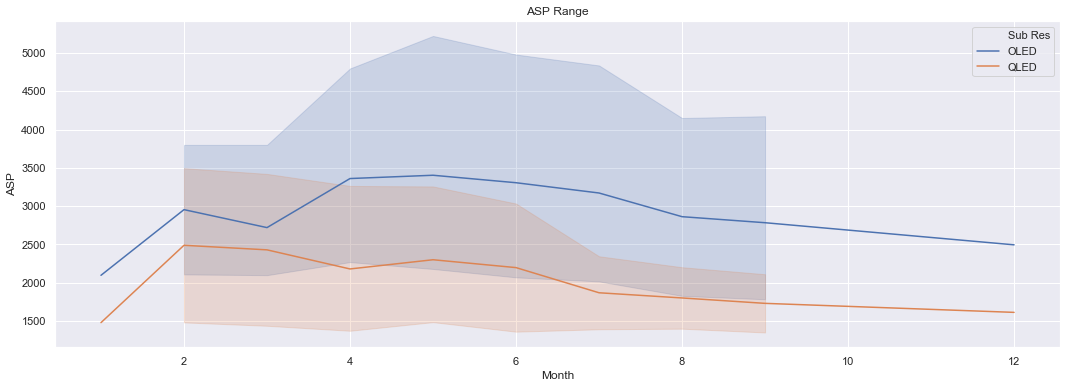

In [7]:
sns.set(style="darkgrid")

# data = data[data['BrandGroup'] != 'Other']
# df4 = df4[df4['BrandGroup'] != 'OPP']

sns.lineplot(x="Month", y="ASP",
             hue="Sub Res",
             data=dat).set_title('ASP Range')

In [8]:
# sns.lineplot?

Text(0.5, 1.0, 'Stores Range')

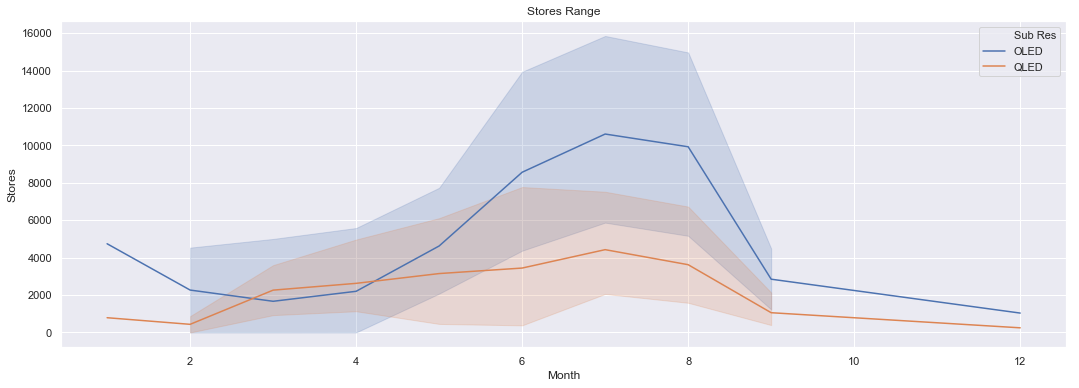

In [9]:
sns.lineplot(x="Month", y="Stores",
             hue="Sub Res",
             data=dat).set_title('Stores Range')

Text(0.5, 1.0, 'ASP Range')

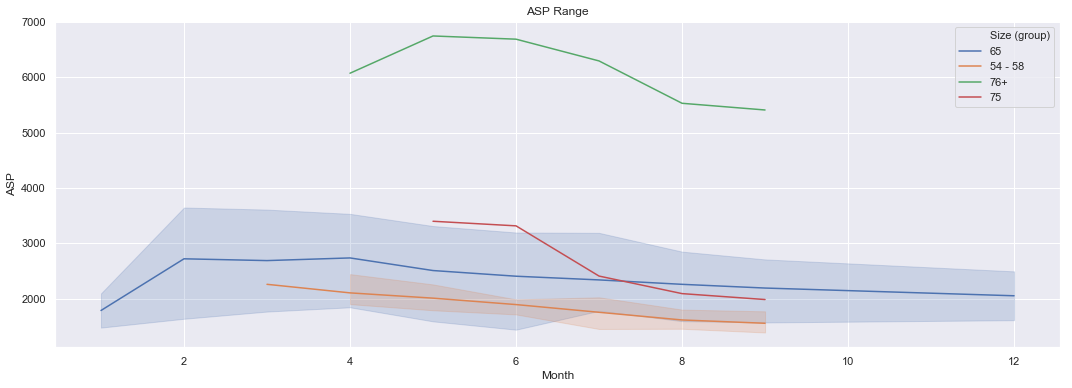

In [10]:
sns.lineplot(x="Month", y="ASP",
             hue="Size (group)",
             data=dat).set_title('ASP Range')

In [11]:
temp = dat[(dat['Size (group)'] != '76+') & (dat['Size (group)'] != '75') & (dat['Size (group)'] != 'Other')]

# temp=temp[(temp['UHD Segment'] == 'UHD ENTRY') | (temp['UHD Segment'] == 'UHD SIMPLE STEP-UP')]

# print(temp.head())

# sns.lineplot(x="YearMonth", y="ASP",
#              hue="Spec",
#              data=temp).set_title('ASP Range')

In [12]:
dat.head()

,Outlet,BrandGroup,Brand,Year,Month,Size (group),UHD Segment,Sub Res,UnitsFilter,Units,Dollars,Stores,UnitsPerStore,ASP,YearMonth,Spec,BrandSegment
451,Remaining Retail,T1,LG,2019,1,65,UHD PREMIUM,OLED,>200,6595.0,13832240,4744,1.390177,2097,201926,LG 65 UHD PREMIUM,LG UHD PREMIUM
462,Remaining Retail,T1,LG,2019,2,65,UHD PREMIUM,OLED,>200,3932.0,8293648,4536,0.866843,2109,201940,LG 65 UHD PREMIUM,LG UHD PREMIUM
471,Remaining Retail,T1,LG,2019,3,54 - 58,UHD PREMIUM,OLED,>200,5.0,11305,1,5.000000,2261,201949,LG 54 - 58 UHD PREMIUM,LG UHD PREMIUM
475,Remaining Retail,T1,LG,2019,3,65,UHD PREMIUM,OLED,>200,3738.0,7847901,5001,0.747451,2099,201901,LG 65 UHD PREMIUM,LG UHD PREMIUM
489,Remaining Retail,T1,LG,2019,4,54 - 58,UHD PREMIUM,OLED,>200,414.0,1012298,2544,0.162736,2445,201919,LG 54 - 58 UHD PREMIUM,LG UHD PREMIUM


Text(0.5, 1.0, 'ASP Range')

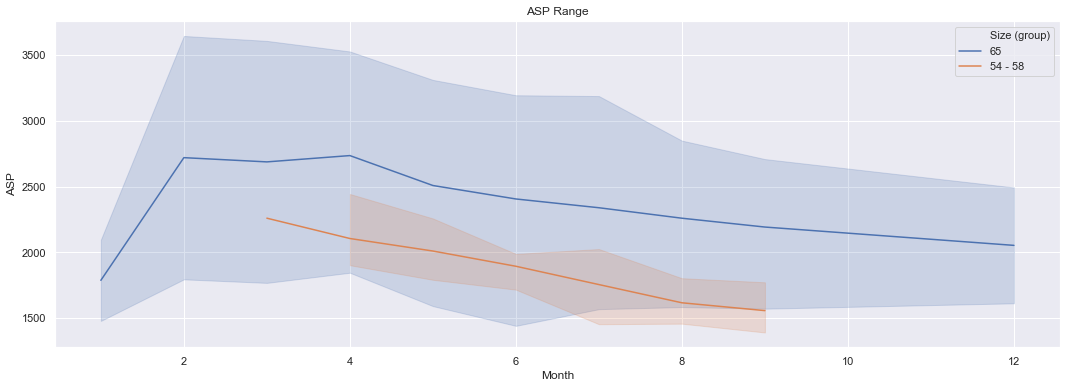

In [33]:
sns.lineplot(x="Month", y="ASP",
             hue="Size (group)",
             data=temp).set_title('ASP Range')

In [49]:
dat2 = df3
dat2 = dat2[dat2['Brand'] == 'VIZIO']

# print(dat2.head())

VZ = dat2[(dat2['Brand'] == 'VIZIO') & (dat2['Size (group)'] == '65') & (dat2['UHD Segment'] == 'UHD PREMIUM') & (dat2['Year'] == 2019)]

VZ




,Outlet,BrandGroup,Brand,Date,Year,Week,Size (group),UHD Segment,Sub Res,UnitsFilter,Units,Dollars,Stores,YearWk,UnitsPerStore,ASP
8822,Remaining Retail,VIZIO,VIZIO,2018-12-31,2019,1,65,UHD PREMIUM,QLED,>200,76.0,122599,250,201830,0.304000,1613
8852,Remaining Retail,VIZIO,VIZIO,2019-01-07,2019,2,65,UHD PREMIUM,QLED,>200,17.0,23690,316,201908,0.053797,1393
8879,Remaining Retail,VIZIO,VIZIO,2019-01-14,2019,3,65,UHD PREMIUM,QLED,>200,111.0,167060,158,201935,0.702532,1505
8909,Remaining Retail,VIZIO,VIZIO,2019-01-21,2019,4,65,UHD PREMIUM,QLED,>200,573.0,851339,158,201728,3.626582,1485
8939,Remaining Retail,VIZIO,VIZIO,2019-01-28,2019,5,65,UHD PREMIUM,QLED,>200,418.0,612976,158,201831,2.645570,1466
8969,Remaining Retail,VIZIO,VIZIO,2019-02-04,2019,6,65,UHD PREMIUM,QLED,>200,212.0,317948,218,201721,0.972477,1499
8998,Remaining Retail,VIZIO,VIZIO,2019-02-11,2019,7,65,UHD PREMIUM,QLED,>200,101.0,144298,218,201821,0.463303,1428
9027,Remaining Retail,VIZIO,VIZIO,2019-02-18,2019,8,65,UHD PREMIUM,QLED,>200,154.0,225600,218,201802,0.706422,1464
9057,Remaining Retail,VIZIO,VIZIO,2019-02-25,2019,9,65,UHD PREMIUM,QLED,>200,74.0,114119,218,201832,0.339450,1542
9086,Remaining Retail,VIZIO,VIZIO,2019-03-04,2019,10,65,UHD PREMIUM,QLED,>200,81.0,118854,232,201920,0.349138,1467


In [50]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

import numpy as np
import pandas as pd
import scipy
import peakutils

In [ ]:
time_series = VZ['Units']
time_series = np.asarray(time_series)

df = VZ[0:30]

table = ff.create_table(df)
py.iplot(table, filename='milk-production-dataframe')

print(df.head())